## Working with data files

In this tutorial, we will use data files as input. We will start with the most basic ways of importing data using core Python functions, then use Numpy and the data analysis package Pandas.

First we will use a small CTD calibration data set and use it to understand how to work with 2-D arrays.

Then, we will work with a larger data set from the 2013 West Coast Ocean Acidification cruise on the R/V Pt. Sur.

In [37]:
%matplotlib notebook
import numpy as np
import pandas as p
from scipy import stats
from matplotlib import pyplot as plt

### CTD calibration data

The lowest level method of using files as data input in Python is to work with file handles. The `open()` function loads the file into memory (that is, the computer's short-term memory where data can be accessed quickly). The file handle represents the location of the file in memory.

The first file that we will work with is a table of CTD measurements of temperature in a calibration bath (Table 3.14.3 of Emery and Thomson). 

In [38]:
filename = 'data/week02_ctd_calibration/ctd_cal.csv'
fhand = open(filename)
fhand.read()

'CTD1,CTD2,CTD3\n15.001, 15.004, 15.002\n14.999, 15.002, 15.003\n15.000, 15.001, 15.000\n14.998, 15.004, 15.002'

Here `\n` represents a newline character. Newline characters are always present in text files, but text files make them invisible and display a new line.

Once the file handle has been read to the end of the file, it cannot be read any more.

In [39]:
fhand.read()

''

In order to read the file again, it has to be opened again. The contents of the file can also be read line by line. This can be useful if there is some processing step that has to be done to each line individually.

In [40]:
fhand = open(filename)
for line in fhand:
    print(line)
    print('next line')

CTD1,CTD2,CTD3

next line
15.001, 15.004, 15.002

next line
14.999, 15.002, 15.003

next line
15.000, 15.001, 15.000

next line
14.998, 15.004, 15.002
next line


For numeric data, the NumpPy package provides an easy way to load data from a text file directly into an array. You can specify the number of header lines, the delimiter that separates data values, and many other options for specifiying the format.

In [41]:
data = np.genfromtxt(filename,skip_header=1,delimiter=',')
print(data)

[[ 15.001  15.004  15.002]
 [ 14.999  15.002  15.003]
 [ 15.     15.001  15.   ]
 [ 14.998  15.004  15.002]]


In [42]:
type(data)

numpy.ndarray

This data set has two dimensions (rows and columns). Some data sets can have more than two dimensions. An oceanographic data set might have separate dimensions for time, depth, latitude and longitude. This data set could be visualized as a series of cubes.

In [43]:
np.ndim(data) # number of dimensions

2

For this two-dimensional data set, the "shape" is specified by the number of rows and columns.

In [44]:
np.shape(data) # (rows, columns)

(4, 3)

To obtain just the number of rows or columns, use indexing.

In [45]:
np.shape(data)[1] # just the columns

3

Rows and columns can be accessed by "slicing" the data set. The location of each value in the array can be represented by two indices. The first represents the row index, and the second represents the column index.

In [46]:
data[1,2]

15.003

A colon `:` can be used to access all values in a row or column. To access all rows in the 0 column:

In [47]:
data[:,0]

array([ 15.001,  14.999,  15.   ,  14.998])

In [48]:
data

array([[ 15.001,  15.004,  15.002],
       [ 14.999,  15.002,  15.003],
       [ 15.   ,  15.001,  15.   ],
       [ 14.998,  15.004,  15.002]])

Indices can also referenced to the end of the rows and columns with negative numbers.

In [49]:
data[-3,-2]

15.002000000000001

Numpy functions can also often be applied just along rows or columns. Take the `np.mean` function. The grand mean of all values is given by:

In [50]:
np.mean(data) # grand mean

15.001333333333333

Taking the mean along `axis=0` gives the column mean. This is the mean of all the rows (dimension 0) in each column. The result is one value for each column.

In [51]:
np.mean(data,axis=0)

array([ 14.9995 ,  15.00275,  15.00175])

To obtain the mean of each row, use the `axis = 1` option.

In [52]:
np.mean(data,axis=1)

array([ 15.00233333,  15.00133333,  15.00033333,  15.00133333])

#### Exercise:  ANOVA (the hard way)

Calculate the sum of squares within groups and the sum of squares between groups. Use these values to caluculate F in an analysis of variance.

__Hint:__ the `np.tile` function may be useful.

In [53]:
arr = [1,2,3]
np.tile([1,2,3],(3,1))

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

The stats library can be used to fund critical values of the F distribution (compare with tables).

In [54]:
stats.f.ppf(0.95,4,3)

9.1171822532464173

## West Coast Ocean Acidification cruise

As an example of a larger data set, we will use publicly-available data from the 2013 West Coast Ocean Acidification cruise on the R/V Point Sur. See the [readme file](data/week02_wcoa_cruise/readme.txt) for details, as well as:
https://catalog.data.gov/dataset/dissolved-inorganic-carbon-total-alkalinity-ph-and-other-variables-collected-from-profile-and-d9eef0

Reference for data:

Feely, R.A., S.R. Alin, B. Hales, G.C. Johnson, R.H. Byrne, W.T. Peterson, X. Liu, and D. Greeley. 2015. Chemical and hydrographic profile measurements during the West Coast Ocean Acidification Cruise WCOA2013 (August 3-29, 2013). http://cdiac.ornl.gov/ftp/oceans/WCOA2013/. Carbon Dioxide Information Analysis Center, Oak Ridge National Laboratory, US Department of Energy, Oak Ridge, Tennessee. doi: 10.3334/CDIAC/OTG.COAST_WCOA2013


We will use the Pandas library to load the data and work with it. Pandas is a useful data analysis package, particularly if the data is in columns (like a spresdsheet) and each column represents a different variable.

In [55]:
filename = 'data/week02_wcoa_cruise/WCOA2013_hy1.csv'
df = pd.read_csv(filename,header=31)
df.head()

,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,DATE,TIME,...,TCARBN,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA
0,317W20130803,WCOA2013,1,2,11,1,1,2,8/5/13,2:12:20,...,2370.2,2,2369.0,2,7.294,2,25,-999.000,9,-999.0
1,317W20130803,WCOA2013,1,2,11,1,2,2,8/5/13,2:12:53,...,-999.0,9,-999.0,9,7.295,2,25,-999.000,9,-999.0
2,317W20130803,WCOA2013,1,2,11,1,3,2,8/5/13,2:19:58,...,2349.6,2,2343.7,2,7.282,2,25,43.521,3,-999.0
3,317W20130803,WCOA2013,1,2,11,1,4,2,8/5/13,2:27:01,...,2318.7,2,2311.9,2,7.287,2,25,45.641,2,-999.0
4,317W20130803,WCOA2013,1,2,11,1,5,2,8/5/13,2:30:53,...,2300.0,2,2299.7,2,7.308,2,25,47.741,2,-999.0


The `df.head()` command displays the first five rows of the data set, which can be useful for getting a sense of its structure. The entire data set is now represented by a variable called `df` which is a Pandas data frame.

In [56]:
type(df)

pandas.core.frame.DataFrame

A quick look at the data shows that missing values are represented by the value -999. In Pandas and NumPy, a useful way to represent missing data is with NaN (not a number values).

In [57]:
df = pd.read_csv(filename,header=31,na_values=-999)

In [58]:
df.head()

,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,DATE,TIME,...,TCARBN,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA
0,317W20130803,WCOA2013,1,2,11,1,1,2,8/5/13,2:12:20,...,2370.2,2,2369.0,2,7.294,2,25.0,NaN,9,NaN
1,317W20130803,WCOA2013,1,2,11,1,2,2,8/5/13,2:12:53,...,NaN,9,NaN,9,7.295,2,25.0,NaN,9,NaN
2,317W20130803,WCOA2013,1,2,11,1,3,2,8/5/13,2:19:58,...,2349.6,2,2343.7,2,7.282,2,25.0,43.521,3,NaN
3,317W20130803,WCOA2013,1,2,11,1,4,2,8/5/13,2:27:01,...,2318.7,2,2311.9,2,7.287,2,25.0,45.641,2,NaN
4,317W20130803,WCOA2013,1,2,11,1,5,2,8/5/13,2:30:53,...,2300.0,2,2299.7,2,7.308,2,25.0,47.741,2,NaN


Pretty much any operation involving a NaN results in another NaN.

In [59]:
print(np.nan)

nan


In [60]:
print(np.nan*4)

nan


In [61]:
print(np.nan+2)

nan


Since NaNs do not represent any value, they are not equal to each other. However, you can test whether a variable is a NaN with the `np.isnan` function.

In [62]:
n = np.nan
print(n==np.nan)

False


In [63]:
print(np.isnan(n))

True


Individual variables in a DataFrame can be accessed with the following syntax (which is similar to a "dictionary" variable type in the core Python language).

In [64]:
df['PH_TOT']

0      7.294
1      7.295
2      7.282
3      7.287
4      7.308
5      7.348
6      7.483
7      7.468
8      7.525
9      7.627
10     7.720
11     7.756
12     7.761
13     7.823
14     7.889
15     7.936
16     7.976
17     7.980
18       NaN
19     7.983
20     7.292
21     7.291
22     7.278
23     7.302
24     7.323
25     7.341
26     7.355
27     7.434
28     7.565
29     7.642
       ...  
942    7.458
943    7.466
944    7.478
945    7.619
946    7.750
947    7.869
948    7.943
949    7.961
950    7.403
951    7.381
952    7.353
953    7.320
954    7.313
955    7.309
956    7.298
957    7.298
958    7.310
959    7.338
960    7.367
961    7.400
962    7.397
963    7.429
964    7.460
965    7.462
966    7.572
967    7.684
968    7.830
969    7.869
970    7.956
971    7.982
Name: PH_TOT, dtype: float64

The variable names are called "keys".

In [65]:
print(df.keys())

Index(['EXPOCODE', 'SECT_ID', 'LEG', 'LINE', 'STNNBR', 'CASTNO', 'BTLNBR',
       'BTLNBR_FLAG_W', 'DATE', 'TIME', 'LATITUDE', 'LONGITUDE', 'DEPTH',
       'CTDPRS', 'CTDTMP', 'CTDSAL', 'CTDSAL_FLAG_W', 'CTDOXY',
       'CTDOXY_FLAG_W', 'SALNTY', 'SALNTY_FLAG_W', 'OXYGEN', 'OXYGEN_FLAG_W',
       'SILCAT', 'SILCAT_FLAG_W', 'NITRAT', 'NITRAT_FLAG_W', 'NITRIT',
       'NITRIT_FLAG_W', 'PHSPHT', 'PHSPHT_FLAG_W', 'AMMONI', 'AMMONI_FLAG_W',
       'TCARBN', 'TCARBN_FLAG_W', 'ALKALI', 'ALKALI_FLAG_W', 'PH_TOT',
       'PH_TOT_FLAG_W', 'PH_TMP', 'CO32', 'CO32__FLAG_W', 'CHLORA'],
      dtype='object')


Indexing works on a DataFrame just like an array or list.

In [66]:
df['PH_TOT'][0:4]

0    7.294
1    7.295
2    7.282
3    7.287
Name: PH_TOT, dtype: float64

#### Plotting functions

The PyPlot library contains many useful plotting functions. The most basic one is `plt.plot`.

<IPython.core.display.Javascript object>


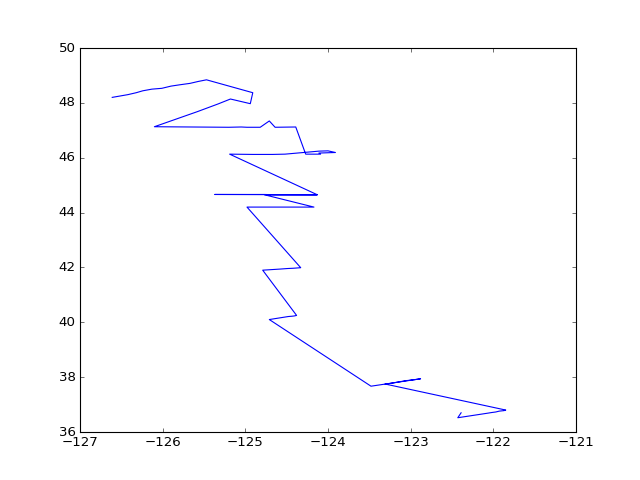

In [67]:
plt.plot(df['LONGITUDE'],df['LATITUDE'])

<IPython.core.display.Javascript object>


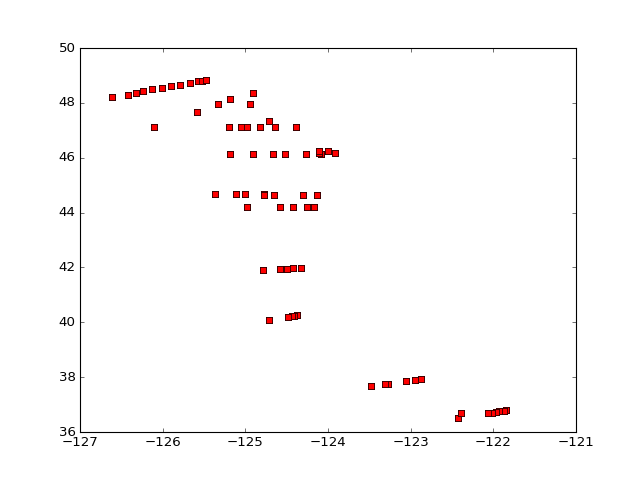

In [68]:
plt.figure() # make new figure
plt.plot(df['LONGITUDE'],df['LATITUDE'],'rs')

<IPython.core.display.Javascript object>


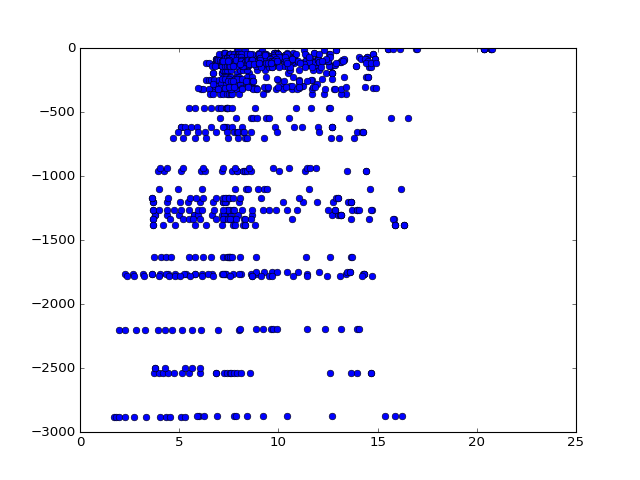

In [69]:
plt.figure()
plt.plot(df['CTDTMP'],-df['DEPTH'],'o')

#### Subsets of data

The `np.where` function is useful for isolating subsets of data. In this case, we can isolate data from certain latitudes.

In [70]:
ii, = np.where(df['LATITUDE']>42)

<IPython.core.display.Javascript object>


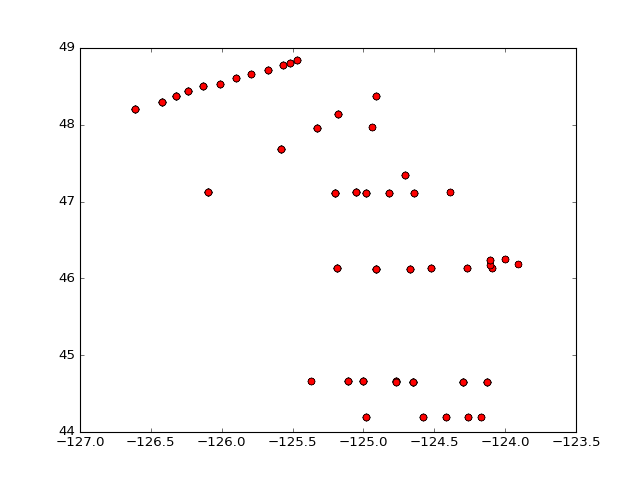

In [71]:
plt.figure()
plt.plot(df['LONGITUDE'][ii],df['LATITUDE'][ii],'ro')

The output of `np.where` gives a list of indices that meet the specified conditions. 

In [72]:
print(ii)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24